In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, plot_roc_curve, roc_curve, recall_score, precision_score, precision_recall_curve, auc, roc_auc_score, f1_score


In [2]:
wine = pd.read_csv('white_wine.csv')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [4]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)
wine['label'] = np.where(wine['quality']>6, 1, 0)
wine['label'].value_counts(normalize=True)*100

0    81.153846
1    18.846154
Name: label, dtype: float64

We will be doing some EDA to check the target variabel distribution. The target variabel distribution is
1. (+) a good quality wine : quality > 6 (18.9%)
1. (-) a bad quality wine : quality <= 6 (81.1%)

You will find that the distribution is imbalanced with 18.9 % positive class and 81.1 % negative class. The minority class is the good quality one, we migh more interest to detect a wine with good quality than the common one.

Text(0, 0.5, 'Density')

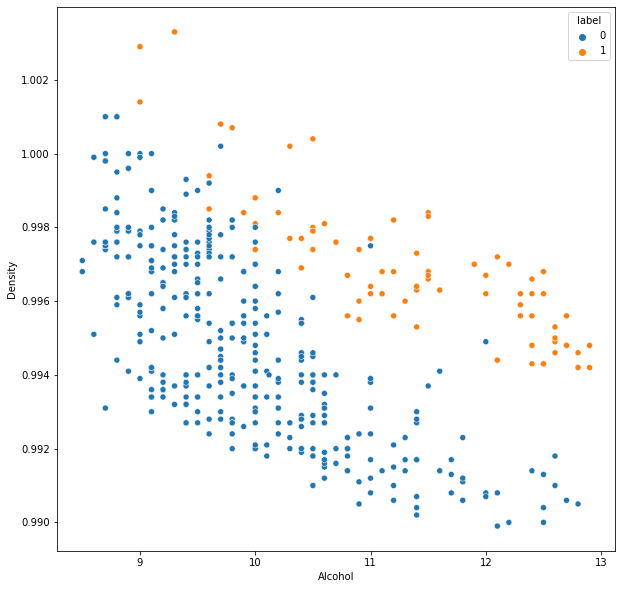

In [5]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'alcohol', y = 'density', data=wine, hue='label')
plt.xlabel('Alcohol')
plt.ylabel('Density')

In [6]:
X = wine[['density', 'alcohol']]
y = wine['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)

## Model 1: w/o Polynomial

In [8]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = logit.predict(X_test)
print('performance \n', classification_report(y_test, y_pred))

performance 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



From illustration abovel, you can see the performance of the machine learning model. Let's say our concern is to these three metrics:
1. precision (+) : 0.69
1. recall (+) : 0.38
1. f1-score (+) : 0.49

<br>
next, we will do the modeling process with adding polynomial features and see the changes.

## Model 2: w/ Polynomial

In [10]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
Xtr_poly = poly.transform(X_train)
Xts_poly = poly.transform(X_test)

In [11]:
logit = LogisticRegression()
logit.fit(Xtr_poly, y_train)

C:\Users\johan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = logit.predict(Xts_poly)
print('performance \n', classification_report(y_test, y_pred))

performance 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.95      0.88      0.91        24

    accuracy                           0.97       130
   macro avg       0.96      0.93      0.95       130
weighted avg       0.97      0.97      0.97       130



From illustration abovel, you can see the performance improvement of the machine learning model. The changes of the three metrics:
1. precision (+) : from 0.69 to 0.95
1. recall (+) : from 0.38 to 0.88
1. f1-score (+) : from 0.49 to 0.91

> ## Resampling Method : Non Performing Loan

In [13]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [14]:
bankloan = pd.read_csv('bankloan.csv')

In [15]:
fitur = ['employ','debtinc','creddebt','othdebt']
target=['default']

In [17]:
X = bankloan[fitur]
y = bankloan[target]

> ## EDA

In [20]:
bankloan['default'].value_counts(normalize=True)*100

0    73.857143
1    26.142857
Name: default, dtype: float64

In [27]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state = 1899)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=0.2, random_state = 1899)

## 1. Logreg No Treatment - F1 Score & Threshold optimization

In [28]:
logit = LogisticRegression()
logit.fit(X_train_val, y_train_val)

C:\Users\johan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [50]:
y_pred = logit.predict(X_test)
prob1=logit.predict_proba(X_test)[:,1]

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       103
           1       0.68      0.41      0.51        37

    accuracy                           0.79       140
   macro avg       0.75      0.67      0.69       140
weighted avg       0.78      0.79      0.77       140



In [52]:
fpr, tpr, threshold = roc_curve(y_test,prob1)

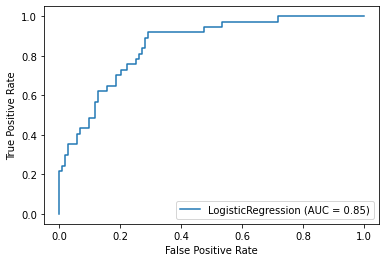

In [36]:
plot_roc_curve(logit, X_test, y_test)
plt.show()

In [41]:
logit.fit(X_train, y_train)

thr_value = [i/100 for i in range(20, 60)]
score=0
score_list=[]

for i in thr_value:
    y_prob = logit.predict_proba(X_val)[:,1]
    y_pred = np.where(y_prob>i,1,0)
    score_temp = f1_score(y_val, y_pred)
    score_list.append(score_temp)
    
    if score_temp > score:
        score=score_temp
        
        best_score = score
        best_thr=i

C:\Users\johan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


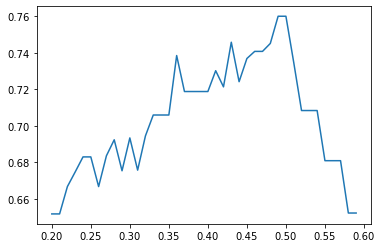

In [42]:
sns.lineplot(thr_value, score_list)
plt.show()

In [43]:
print('best_threshold', best_thr)
print('best score',best_score)

best_threshold 0.49
best score 0.7599999999999999


In [48]:
logit.fit(X_train_val, y_train_val)
y_prob = logit.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>best_thr,1,0)

C:\Users\johan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       103
           1       0.67      0.43      0.52        37

    accuracy                           0.79       140
   macro avg       0.74      0.68      0.70       140
weighted avg       0.78      0.79      0.78       140



In [59]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train_val, y_train_val) #nge undersampling training set

In [60]:
y_train_val['default'].value_counts()

0    414
1    146
Name: default, dtype: int64

In [61]:
y_under['default'].value_counts()

1    146
0    146
Name: default, dtype: int64

In [62]:
logit_under = LogisticRegression()
logit_under.fit(X_under, y_under)
y_pred = logit_under.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79       103
           1       0.50      0.92      0.65        37

    accuracy                           0.74       140
   macro avg       0.73      0.79      0.72       140
weighted avg       0.84      0.74      0.75       140



C:\Users\johan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


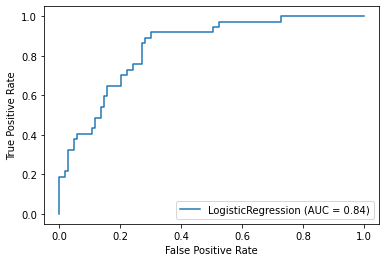

In [64]:
plot_roc_curve(logit_under, X_test, y_test)

In [65]:
smote = SMOTE()
X_smo, y_smo = smote.fit_resample(X_train_val, y_train_val)

In [66]:
y_train_val['default'].value_counts()

0    414
1    146
Name: default, dtype: int64

In [67]:
y_smo['default'].value_counts()

1    414
0    414
Name: default, dtype: int64

In [70]:
logit_smo = LogisticRegression()
logit_smo.fit(X_smo, y_smo)
y_pred_smo = logit_smo.predict(X_test)
print(classification_report(y_test, y_pred_smo))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       103
           1       0.53      0.86      0.66        37

    accuracy                           0.76       140
   macro avg       0.74      0.80      0.74       140
weighted avg       0.83      0.76      0.78       140



C:\Users\johan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [71]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train_val, y_train_val)

In [72]:
y_train_val['default'].value_counts()

0    414
1    146
Name: default, dtype: int64

In [73]:
y_smo['default'].value_counts()

1    414
0    414
Name: default, dtype: int64

In [74]:
logit_ros = LogisticRegression()
logit_ros.fit(X_ros, y_ros)
y_pred_ros = logit_ros.predict(X_test)
print(classification_report(y_test, y_pred_ros))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       103
           1       0.53      0.84      0.65        37

    accuracy                           0.76       140
   macro avg       0.73      0.78      0.73       140
weighted avg       0.82      0.76      0.77       140



C:\Users\johan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [82]:
ros_df = pd.concat([X_ros, y_ros],axis=1)
smo_df = pd.concat([X_smo, y_smo],axis=1)
under_df = pd.concat([X_under, y_under],axis=1)
df = pd.concat([X_train_val,y_train_val],axis=1)

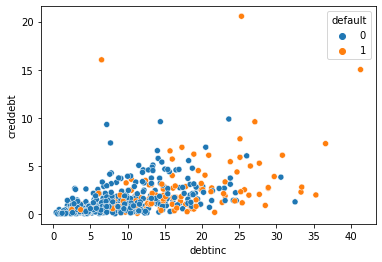

In [80]:
sns.scatterplot(x='debtinc',y='creddebt',data=df, hue='default')

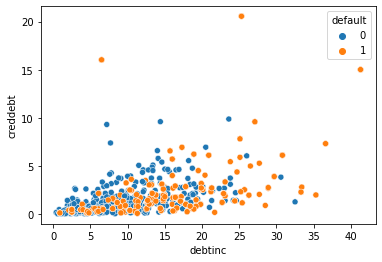

In [76]:
sns.scatterplot(x='debtinc',y='creddebt',data=ros_df, hue='default')

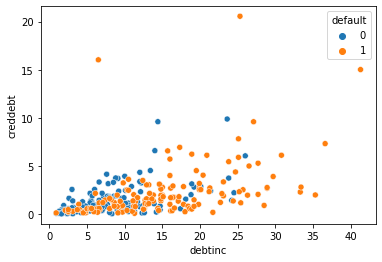

In [83]:
sns.scatterplot(x='debtinc',y='creddebt',data=under_df, hue='default')

# Penalized

### memberi perhatian imbang kepada label yang rationya lebih kecil

In [84]:
logit_balance=LogisticRegression(class_weight = 'balanced')
logit_balance.fit(X_train_val, y_train_val)
y_pred_bal = logit_balance.predict(X_test)
print(classification_report(y_test,y_pred_bal))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       103
           1       0.53      0.89      0.67        37

    accuracy                           0.76       140
   macro avg       0.74      0.81      0.74       140
weighted avg       0.84      0.76      0.78       140



C:\Users\johan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


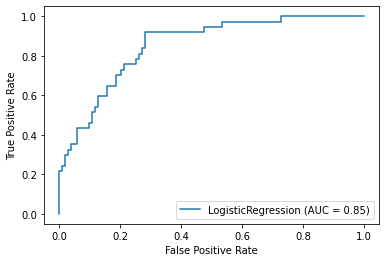

In [85]:
plot_roc_curve(logit_balance, X_test, y_test)

> ## Summary

In [87]:
f1_no_treat = f1_score(y_test, logit.predict(X_test))

y_prob1 = logit.predict_proba(X_test)[:,1]
f1_no_treat_thr = f1_score(y_test, np.where(y_prob1>best_thr,1,0))

f1_under = f1_score(y_test, logit_under.predict(X_test))
f1_ros = f1_score(y_test, logit_ros.predict(X_test))
f1_smo = f1_score(y_test, logit_smo.predict(X_test))
f1_balance = f1_score(y_test, logit_balance.predict(X_test))

In [90]:
score_list = [f1_no_treat, f1_no_treat_thr, f1_under,f1_ros,f1_smo,f1_balance]
model_name='default threshold_opt undersampling oversampling SMOTE penalized'.split()

df_summary = pd.DataFrame({
    'method':model_name,
    'score':score_list
})
df_summary

,method,score
0,default,0.508475
1,threshold_opt,0.524590
2,undersampling,0.647619
3,oversampling,0.645833
4,SMOTE,0.659794
5,penalized,0.666667


## Combine Cross Validation with Balancing Method

In [91]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [92]:
X,y

(     employ  debtinc   creddebt   othdebt
 0        17      9.3  11.359392  5.008608
 1        10     17.3   1.362202  4.000798
 2        15      5.5   0.856075  2.168925
 3        15      2.9   2.658720  0.821280
 4         2     17.3   1.787436  3.056564
 ..      ...      ...        ...       ...
 695       6      4.6   0.262062  0.979938
 696       6     11.5   0.369495  2.045505
 697      15      7.6   0.491264  1.940736
 698      19      8.4   2.302608  4.165392
 699      12     14.7   2.994684  3.473316
 
 [700 rows x 4 columns],
      default
 0          1
 1          0
 2          0
 3          0
 4          1
 ..       ...
 695        1
 696        0
 697        0
 698        0
 699        0
 
 [700 rows x 1 columns])

> ## Resampling : SMOTE

In [133]:
smote = SMOTE()
logit = LogisticRegression()

estimator = Pipeline([('balancing',smote),
                     ('clf',logit)])

In [134]:
skf = StratifiedKFold(n_splits=5)
model_cv = cross_val_score(estimator, X_train_val, y_train_val, cv=skf, scoring='f1')

In [135]:
print('cv score:',model_cv)
print('cv score mean:',model_cv.mean())

cv score: [0.54320988 0.58333333 0.62686567 0.73015873 0.56338028]
cv score mean: 0.6093895786734411


> ## Penalized

In [136]:
logit_balanced = LogisticRegression(class_weight = 'balanced')
model_cv_balanced = cross_val_score(logit_balanced, X_train_val, y_train_val, cv=skf, scoring='f1')

In [137]:
print('cv score:',model_cv_balanced)
print('cv score mean:',model_cv_balanced.mean())

cv score: [0.56097561 0.60273973 0.60869565 0.76190476 0.52173913]
cv score mean: 0.6112109760593905


In [139]:
smote=SMOTE()
model=LogisticRegression()
estimator=Pipeline([('balancing',smote),
                   ('clf',model)])

hyperparam_space = {
    'balancing__k_neighbors':[2,5,10,15,20],
    'clf__C':[100,10,1,0.1,0.01,0.001],
    'clf__solver':['liblinear','newton-cg']
}
skf=StratifiedKFold(n_splits=5)

grid_search=GridSearchCV(estimator, hyperparam_space,cv=skf,scoring='f1',n_jobs=-1,verbose=1)

In [140]:
grid_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__solver': ['liblinear', 'newton-cg']},
             scoring='f1', verbose=1)

In [141]:
print('best score',grid_search.best_score_)
print('best parameter',grid_search.best_params_)

best score 0.6244347941594205
best parameter {'balancing__k_neighbors': 15, 'clf__C': 10, 'clf__solver': 'liblinear'}


In [143]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balancing__k_neighbors,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023543,0.001018,0.007376,0.001200,2,100,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.543210,0.591549,0.617647,0.750000,0.521739,0.604829,0.080145,46
1,0.060242,0.002491,0.007380,0.002326,2,100,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.554217,0.611111,0.626866,0.750000,0.529412,0.614321,0.076679,14
2,0.023935,0.002748,0.006689,0.000586,2,10,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.543210,0.594595,0.636364,0.761905,0.542857,0.615786,0.081005,10
3,0.045011,0.006102,0.004787,0.000399,2,10,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.543210,0.583333,0.617647,0.741935,0.555556,0.608336,0.071537,36
4,0.019960,0.002691,0.006184,0.002475,2,1,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.550000,0.594595,0.626866,0.750000,0.542857,0.612863,0.075085,18
5,0.048073,0.015610,0.005788,0.002221,2,1,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.538462,0.594595,0.636364,0.738462,0.542857,0.610148,0.073567,30
6,0.025335,0.006868,0.005983,0.000887,2,0.1,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.543210,0.605263,0.591549,0.750000,0.542857,0.606576,0.075991,42
7,0.034507,0.005971,0.005586,0.001196,2,0.1,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.536585,0.600000,0.636364,0.741935,0.542857,0.611548,0.074951,22
8,0.017156,0.002985,0.004985,0.001090,2,0.01,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.554217,0.625000,0.600000,0.727273,0.563380,0.613974,0.062103,16
9,0.036702,0.006862,0.006182,0.000978,2,0.01,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.556962,0.571429,0.628571,0.730159,0.542857,0.605996,0.068574,43


> ## Model Performance Before Tuning

In [145]:
smote=SMOTE()
logit = LogisticRegression()

estimator=Pipeline([('balancing',smote),
                   ('clf',model)])
estimator.fit(X_train_val, y_train_val)
y_pred_default = estimator.predict(X_test)

print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       103
           1       0.52      0.86      0.65        37

    accuracy                           0.76       140
   macro avg       0.73      0.79      0.73       140
weighted avg       0.83      0.76      0.77       140



> ## Model Performance After Tuning

In [146]:
estimator_tuned = grid_search.best_estimator_.fit(X_train_val, y_train_val)
y_pred_tuned = estimator_tuned.predict(X_test)

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       103
           1       0.54      0.92      0.68        37

    accuracy                           0.77       140
   macro avg       0.75      0.82      0.75       140
weighted avg       0.85      0.77      0.78       140



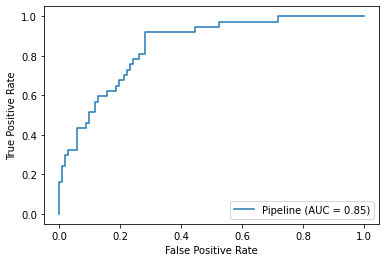

In [147]:
plot_roc_curve(estimator_tuned, X_test, y_test)

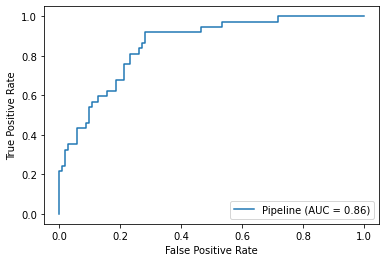

In [148]:
plot_roc_curve(estimator, X_test, y_test)